In [1]:
import networkx as nx
import numpy as np

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit import BasicAer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import SPSA

from qiskit.visualization import plot_histogram

# Generate a graph of 4 nodes
n = 4
graph = nx.Graph()
graph.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
graph.add_weighted_edges_from(elist)

# Compute the weight matrix from the graph
w = nx.adjacency_matrix(graph)

# Formulate the problem as quadratic program
problem = QuadraticProgram()
_ = [problem.binary_var('x{}'.format(i)) for i in range(n)]  # create n binary variables
linear = w.dot(np.ones(n))
quadratic = -w
problem.maximize(linear=linear, quadratic=quadratic)

# Fix node 0 to be 1 to break the symmetry of the max-cut solution
problem.linear_constraint([1, 0, 0, 0], '==', 1)

# Run quantum algorithm QAOA on qasm simulator
spsa = SPSA(maxiter=250)
backend = BasicAer.get_backend('qasm_simulator')
qaoa = QAOA(optimizer=spsa, reps=5, quantum_instance=backend)
algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(problem)

In [5]:
print(result)  # prints solution, x=[1, 0, 1, 0], the cost, fval=4
sample_results = result.get_probabilities(status=['SUCCESS'])

optimal function value: 4.0
optimal value: [1. 0. 1. 0.]
status: SUCCESS


In [6]:
print(sample_results)

{'1010': 0.04131494974968205, '1001': 0.06813836069401001, '1100': 0.06863754949719401, '1101': 0.0826298994993641, '1000': 0.02024010912708972, '1110': 0.08426629399069363, '1011': 0.0908928894493005, '1111': 0.04525825988018655}


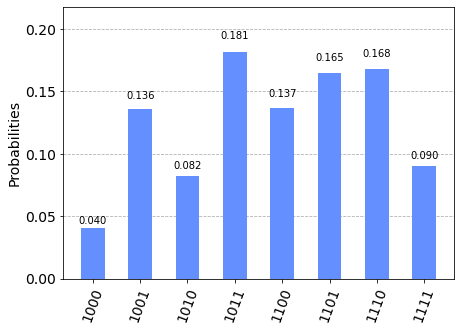

In [7]:
plot_histogram(sample_results)